### KNN Implementation in Python

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm used for both classification and regression tasks. It works by identifying the **k** closest data points (neighbors) in the feature space to a new, unseen data point and making predictions based on the majority class (for classification) or the average value (for regression) of those neighbors.

**Key Characteristics:**
- **Instance-based learning:** KNN does not explicitly learn a model; instead, it memorizes the training dataset and makes predictions at runtime.
- **Distance metric:** The algorithm relies on a distance metric (commonly Euclidean distance) to determine the closeness of data points.
- **Parameter k:** The choice of k (number of neighbors) significantly affects the performance of the algorithm. A small k can be sensitive to noise, while a large k may smooth out class boundaries.

**Advantages:**
- Simple to implement and understand.
- No assumptions about data distribution (non-parametric).
- Naturally handles multi-class problems.

**Disadvantages:**
- Computationally expensive for large datasets, as it requires calculating the distance to every training point.
- Sensitive to the scale of features and irrelevant features.
- Performance can degrade with high-dimensional data (curse of dimensionality).

KNN is particularly useful for smaller datasets where the relationships among data points can be easily visualized and interpreted.

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


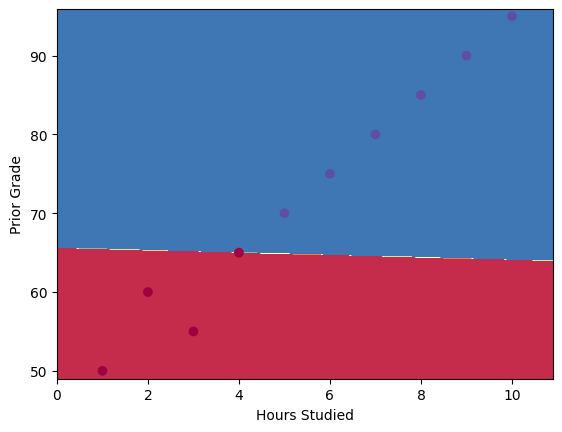

In [ ]:
# import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# sample data (e.g hours studied and prior grade vs pass/fail)
X = np.array([[1,50],[2,60],[3,55],[4,65],[5,70],[6,75],[7,80],[8,85],[9,90],[10,95]])
y = np.array([0,0,0,0,1,1,1,1,1,1]) # 0 = fail, 1 = pass

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # k = 3

# train the model
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

# visualise the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Hours Studied")
plt.ylabel("Prior Grade")
plt.show()